# Gather Data

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import time
import requests
import re

In [2]:
with open('twitter_keys.txt') as file:
    keys = json.loads(file.readline())
consumer_key = keys['consumer_key']
consumer_secret = keys['consumer_secret']
access_token = keys['access_token']
access_secret = keys['access_secret']

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url, allow_redirects=True)
with open('image_predictions.tsv','wb') as f:
    f.write(req.content)

In [6]:
breed_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [7]:
'''start = time.time()
deadlinks = []

with open('tweet_json.txt','w') as json_file:
    for tweet_id in tweets.tweet_id:
        try:
            status = api.get_status(tweet_id, tweet_mode="extended")
            print('Tweet ID: {} @ {:.2f} minutes'.format(tweet_id, (time.time() - start)/60))
            json.dump(status._json, json_file)
            json_file.write('\n')
        except:
            print("POST NOT FOUND: {}".format(tweet_id))
            deadlinks.append(tweet_id)
'''

'start = time.time()\ndeadlinks = []\n\nwith open(\'tweet_json.txt\',\'w\') as json_file:\n    for tweet_id in tweets.tweet_id:\n        try:\n            status = api.get_status(tweet_id, tweet_mode="extended")\n            print(\'Tweet ID: {} @ {:.2f} minutes\'.format(tweet_id, (time.time() - start)/60))\n            json.dump(status._json, json_file)\n            json_file.write(\'\n\')\n        except:\n            print("POST NOT FOUND: {}".format(tweet_id))\n            deadlinks.append(tweet_id)\n'

In [8]:
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [9]:
tweet_data = pd.DataFrame(status)
tweet_data = tweet_data[['id','retweet_count','favorite_count','display_text_range','entities']]

# Assess Data

In [10]:
tweets.shape

(2356, 17)

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
tweets[tweets.expanded_urls.str.len() > 63]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [14]:
tweets.expanded_urls[2260]

'https://twitter.com/dogratingrating/status/667548415174144001/photo/1,https://twitter.com/dogratingrating/status/667548415174144001/photo/1'

In [15]:
tweets[(tweets.in_reply_to_status_id > 10000) | (tweets.retweeted_status_id > 10000)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [16]:
tweets.describe()[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [17]:
tweets.query('rating_numerator > 100')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [18]:
tweets.query('rating_denominator%10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
# 775096608509886464 in deadlinks

In [20]:
tweets.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Rudy         1
Taz          1
Rey          1
Traviss      1
Kody         1
Name: name, Length: 957, dtype: int64

In [21]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
tweets.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
tweets.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [26]:
tweet_data.shape

(2331, 5)

In [27]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   display_text_range  2331 non-null   object
 4   entities            2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [28]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2658.118404,7467.519949
std,6.823170e+16,4495.337686,11594.486437
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,539.000000,1299.500000
50%,7.182469e+17,1244.000000,3246.000000
75%,7.986692e+17,3090.000000,9147.500000
max,8.924206e+17,76391.000000,154114.000000


In [29]:
tweet_data.head()

,id,retweet_count,favorite_count,display_text_range,entities
0,892420643555336193,7560,35740,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1,892177421306343426,5601,30885,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions..."
2,891815181378084864,3712,23228,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions..."
3,891689557279858688,7744,39041,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions..."
4,891327558926688256,8339,37294,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ..."


In [30]:
tweet_data.display_text_range.apply(lambda x: x[1]).describe()

count    2331.000000
mean      111.075933
std        27.384275
min        11.000000
25%        93.000000
50%       116.000000
75%       137.000000
max       165.000000
Name: display_text_range, dtype: float64

In [31]:
tweet_data.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [32]:
tweet_data.query('retweet_count > 50000')

,id,retweet_count,favorite_count,display_text_range,entities
517,807106840509214720,55681,118986,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1015,744234799360020481,76391,154114,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1055,739238157791694849,56792,113937,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions..."


In [33]:
tweet_data.query('retweet_count < 10')

,id,retweet_count,favorite_count,display_text_range,entities
29,886267009285017600,4,111,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions..."
54,881633300179243008,7,115,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions..."
109,870726314365509632,3,114,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions..."
262,840698636975636481,2,174,"[12, 56]","{'hashtags': [], 'symbols': [], 'user_mentions..."
279,838085839343206401,1,138,"[23, 63]","{'hashtags': [], 'symbols': [], 'user_mentions..."
328,832088576586297345,2,62,"[13, 40]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1056,738891149612572673,6,108,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions..."
1271,707983188426153984,2,49,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions..."


In [34]:
breed_predictions.shape

(2075, 12)

In [35]:
breed_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [36]:
breed_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
breed_predictions[breed_predictions.p1_conf > 0.8].sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False


In [38]:
breed_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [39]:
breed_predictions.p1.value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Name: p1, dtype: int64

In [40]:
breed_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
breed_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
breed_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
(breed_predictions.p1_dog & breed_predictions.p2_dog & breed_predictions.p3_dog).value_counts()

True     1243
False     832
dtype: int64

In [44]:
(breed_predictions.p1_dog | breed_predictions.p2_dog | breed_predictions.p3_dog).value_counts()

True     1751
False     324
dtype: int64

## Quality Issues
- `expanded_urls` has missing information, duplicate information, and links to external sites (vine)
- Deadlinks (tweets no longer available) from `tweet_data` to `tweets` table - *this will be fixed by other quality issues*
- Erroneous datatypes for tweet id, status id, user id (should be string)
- Erroneous datatype for timestamps (should be datetime)
- Erroneous datatype for We Rate Dogs type (doggo, pupper, etc should be category or boolean)
- Names contain general articles (a, this, an, etc)
- Source have unneccessary hmtl markup, should just have name of app (Twitter for iPhone, Vine, Twitter Web Client, TweetDeck)
- Retweets are included in dataset (total of 259 retweets and replys, should be excluded)
- Ratings incorrectly transcribed from the tweet (e.g. IDs = 666287406224695296, 682962037429899265, 740373189193256964)
- Rating transcribed incorrectly, but no rating included on id 810984652412424192
- Reply contains no picture and inaccurate rating (id = 682808988178739200) - *this will get fixed when we drop the replies from the data set*
- Non-dog items (e.g. orange, banana, turtle, shopping_cart, etc) in `breed_predictions` table - 324 rows without any dog predictions (p1-p3 are all not dogs), and 543 do not have a dog as its primary prediction
- Low-significance information on predictions can be simplified for easier readability
- Low-probability predictions in `breed_predictions` table - *this will be dealt with when we make the best breed prediction using the information above*
- Some posts do not have photos, which does not follow the schema of the data - *this will be fixed by merging the predictions made based on pictures*
- Convert numerator and denominator into number of dogs and average rating for better comparison between tweets

## Tidiness Issues
- `id` in `tweet_data` should be renamed `tweet_id` for consistency
- `display_text_range` should be converted to `text_length` for better analysis
- Entities should be broken into separate columns
- `retweet_count`, `favorite_count`, `text_length` and relevant information from `entities` should be included in `tweets` table because they relate to the tweet
- `tweets` table contains specific information about the dog like `name`, `rating`, and dogtionary classification, but does not contain general information like `breed` on which to base analysis

# Clean Data

In [45]:
# create a clean copy of the dataframes to protect the original data during cleaning
tweets_clean = tweets.copy()
tweet_data_clean = tweet_data.copy()
breed_predictions_clean = breed_predictions.copy()

## Tidiness

### Rename `id` in `tweet_data` table to `tweet_id` for consistency

#### Define
- Use the rename method to change the name of the column

#### Code

In [46]:
tweet_data_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [47]:
tweet_data_clean.head(0)

,tweet_id,retweet_count,favorite_count,display_text_range,entities


### Convert `display_text_range` to a single integer value `text_length`

#### Define
- Convert `display_text_range` (a list of two numbers) into `text_length` (a single value) using a map function to find the difference between the start character and end character

#### Code

In [48]:
tweet_data_clean['text_length'] = tweet_data_clean.display_text_range.map(lambda x: x[1] - x[0])
tweet_data_clean.drop('display_text_range',axis=1,inplace=True)

#### Test

In [49]:
tweet_data_clean.head(2)

,tweet_id,retweet_count,favorite_count,entities,text_length
0,892420643555336193,7560,35740,"{'hashtags': [], 'symbols': [], 'user_mentions...",85
1,892177421306343426,5601,30885,"{'hashtags': [], 'symbols': [], 'user_mentions...",138


In [50]:
tweet_data_clean.dtypes

tweet_id           int64
retweet_count      int64
favorite_count     int64
entities          object
text_length        int64
dtype: object

### Separate entities into separate columns in the dataframe

#### Define
- Separate `entities` into separate columns for the relevant information. In this case, we will only use `hashtags`, `user_mentions`, and `media/type` (will be named `has_photo`).

#### Code

In [51]:
def entity_extract(entities):
    data = {'hashtags':[],'user_mentions':[],'has_photo':[]}
    for info in entities:
        try:
            data['hashtags'].append(info['hashtags'][0]['text'])
        except IndexError:
            data['hashtags'].append(np.NaN)
        try:
            data['user_mentions'].append(info['user_mentions'][0]['screen_name'])
        except:
            data['user_mentions'].append(np.NaN)
        try:
            data['has_photo'].append(info['media'][0]['type'] == 'photo')
        except KeyError:
            data['has_photo'].append(False)
    return data['hashtags'], data['user_mentions'], data['has_photo']

tweet_data_clean['hashtags'],tweet_data_clean['user_mentions'],tweet_data_clean['has_photo'] = entity_extract(tweet_data_clean.entities)
tweet_data_clean.drop('entities', axis=1, inplace=True)

#### Test

In [52]:
tweet_data_clean.head()

,tweet_id,retweet_count,favorite_count,text_length,hashtags,user_mentions,has_photo
0,892420643555336193,7560,35740,85,NaN,NaN,True
1,892177421306343426,5601,30885,138,NaN,NaN,True
2,891815181378084864,3712,23228,121,NaN,NaN,True
3,891689557279858688,7744,39041,79,NaN,NaN,True
4,891327558926688256,8339,37294,138,BarkWeek,NaN,True


### Combine all relevant tweet information into one table

#### Define
- Merge `tweet_data_clean` with `tweets_clean` on `tweet_id`.

#### Code

In [53]:
tweets_clean = pd.merge(tweets_clean, tweet_data_clean, on='tweet_id')

#### Test

In [54]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,retweet_count,favorite_count,text_length,hashtags,user_mentions,has_photo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,7560,35740,85,NaN,NaN,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,5601,30885,138,NaN,NaN,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,3712,23228,121,NaN,NaN,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,None,None,7744,39041,79,NaN,NaN,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,8339,37294,138,BarkWeek,NaN,True


In [55]:
tweets_clean.shape

(2331, 23)

### `tweets` table contains specific information about the dog like `name`, `rating`, and dogtionary classification, but does not contain general information like prediction information on which to base analysis

#### Define
- Merge `tweets` with `breed_predictions` to simplify analysis by dog information

#### Code

In [56]:
tweets_clean = pd.merge(tweets_clean, breed_predictions_clean, on='tweet_id')

#### Test

In [57]:
tweets_clean.shape

(2059, 34)

In [58]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'text_length', 'hashtags',
       'user_mentions', 'has_photo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [59]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Quality Issues

### Erroneous datatypes for `tweet_id` and reply/retweet `user_id` (should be string)

#### Describe
- Use the `astype` method to specify the values of `tweet_id` and `user_id`

#### Code

In [60]:
def id_string(id_val):
    try:
        return str(int(id_val))
    except:
        return id_val

tweets_clean.tweet_id = tweets_clean.tweet_id.apply(id_string)
tweets_clean.in_reply_to_user_id = tweets_clean.in_reply_to_user_id.apply(id_string)
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.apply(id_string)
tweets_clean.retweeted_status_user_id = tweets_clean.retweeted_status_user_id.apply(id_string)
tweets_clean.retweeted_status_id = tweets_clean.retweeted_status_id.apply(id_string)

#### Test

In [61]:
tweets_clean.dtypes

tweet_id                       object
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
retweet_count                   int64
favorite_count                  int64
text_length                     int64
hashtags                       object
user_mentions                  object
has_photo                        bool
jpg_url                        object
img_num                         int64
p1                             object
p1_conf     

### Erroneous datatype for dates

#### Describe
- Use `to_datetime` to convert `timestamp` and `retweeted_status_timestamp`

#### Code

In [62]:
tweets_clean.timestamp = tweets_clean.timestamp.map(lambda x: x[:20])
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)
tweets_clean.retweeted_status_timestamp = pd.to_datetime(tweets_clean.retweeted_status_timestamp.str[:-5], errors='ignore')

#### Test

In [63]:
tweets_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
retweet_count                          int64
favorite_count                         int64
text_length                            int64
hashtags                              object
user_mentions                         object
has_photo 

In [64]:
tweets_clean.timestamp[0]

Timestamp('2017-08-01 16:23:56')

In [65]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Erroneous datatype for the dogtionary terms with redundant information (`doggo` column contains the string "doggo" instead of `True`)

#### Define
- Convert dogtionary term columns into Boolean values in place of the strings

#### Code

In [66]:
tweets_clean.doggo = (tweets_clean.doggo == 'doggo')
tweets_clean.pupper = (tweets_clean.pupper == 'pupper')
tweets_clean.puppo = (tweets_clean.puppo == 'puppo')
tweets_clean.floofer = (tweets_clean.floofer == 'floofer')

#### Test

In [67]:
tweets_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                   bool
floofer                                 bool
pupper                                  bool
puppo                                   bool
retweet_count                          int64
favorite_count                         int64
text_length                            int64
hashtags                              object
user_mentions                         object
has_photo 

### Names contain inaccurate values (None, a, an, the, this, one, all, such, very, etc)

#### Define
- Find all incorrect names ('None' and lowercase words) and replace them with NaN

#### Code

In [68]:
invalid_names = tweets_clean[tweets_clean.name.str.islower()].name.unique().tolist()
invalid_names.append('None')
tweets_clean.name.replace(invalid_names, np.NaN, inplace=True)

#### Test

In [69]:
tweets_clean.name.str.islower().value_counts()

False    1386
Name: name, dtype: int64

In [70]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### `source` has unnecessary HTML markup that is hiding the true source of the post

#### Define
- Strip HTML markup from `source`, which will leave a cleaner string value

#### Code

In [71]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text).replace(' - Make a Scene','')

tweets_clean.source = tweets_clean.source.map(remove_html_tags)

#### Test

In [72]:
tweets_clean.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Retweets are included in dataset (total of 259 retweets and replys, should be excluded)

#### Define
- Drop all tweets that are retweets or replies by masking for tweets that have null values in the retweet and reply columns
- Drop all reply and retweet source columns to simplify table

#### Code

In [73]:
tweets_clean = tweets_clean[(tweets_clean.in_reply_to_status_id.isnull() & tweets_clean.retweeted_status_id.isnull())]

In [74]:
tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [75]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'text_length',
       'hashtags', 'user_mentions', 'has_photo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [76]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### `expanded_urls` has missing information, duplicate information, and links to external sites (vine)

#### Define
- Normalize structure of `expanded_urls` in the form of `https://twitter.com/dog_rates.status/{tweet_id}`

#### Code

In [77]:
tweets_clean.expanded_urls = tweets_clean.tweet_id.apply(lambda x: 'https://twitter.com/dog_rates/status/{}'.format(x))

#### Test

In [78]:
tweets_clean.expanded_urls.apply(lambda x: len(x)).value_counts()

55    1964
Name: expanded_urls, dtype: int64

### Rating transcribed incorrectly, but no rating included on id 810984652412424192

#### Define
- Drop the data containing tweet_id 810984652412424192 because it does not contain a score, which does not fit the established schema for the dataset

#### Code

In [79]:
tweets_clean.drop(tweets_clean[tweets_clean.tweet_id == '810984652412424192'].index, inplace=True)

#### Test

In [80]:
tweets_clean[tweets_clean.tweet_id == '810984652412424192']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Ratings incorrectly transcribed from the tweet (e.g. IDs = 666287406224695296, 682962037429899265, 740373189193256964)

#### Define
- Retranscribe ratings for the tweets to ensure proper encoding

#### Code

In [81]:
def repair_ratings(id):
    data = tweets_clean[tweets_clean.tweet_id.isin([id])]
    index = data.index[0]
    fraction = re.findall(r"\d*/\d*0",tweets_clean.loc[index, 'text'])[0].split('/')
    numerator = int(fraction[0])
    denominator = int(fraction[1])
    return index, numerator, denominator

    
id_list = ['666287406224695296', '682962037429899265', '740373189193256964']

for ident in id_list:
    ind, num, denom = repair_ratings(ident)
    tweets_clean.loc[ind,'rating_numerator'] = num
    tweets_clean.loc[ind,'rating_denominator'] = denom

#### Test

In [82]:
tweets_clean[tweets_clean.tweet_id.isin(['666287406224695296', '682962037429899265', '740373189193256964'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
863,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,False,False,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1392,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,False,False,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
2038,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,False,False,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


### Non-dog items (e.g. orange, banana, turtle, shopping_cart, etc) in breed_predictions table - 324 rows without any dog predictions (p1-p3 are all not dogs), and 543 do not have a dog as its primary prediction

#### Define
- Make a breed prediction (`breed_predict`) for each entry based on the highest confidence prediction that is a breed of dog. If there is no dog breed on the top three predictions, put a null value for the breed prediction.

#### Code

In [83]:
def predict_breed(item):
    if item.p1_dog == True:
        return item.p1.replace('_',' ').title(), item.p1_conf
    elif item.p2_dog == True:
        return item.p2.replace('_',' ').title(), item.p2_conf
    elif item.p3_dog == True:
        return item.p3.replace('_',' ').title(), item.p3_conf
    else:
        return np.NaN, (item.p1_conf+item.p2_conf+item.p3_conf)

tweets_clean['breed_predict'], tweets_clean['breed_conf'] = zip(*tweets_clean.apply(predict_breed, axis=1))

#### Test

In [84]:
tweets_clean.breed_predict.sample(5)

736              Golden Retriever
1750                          Pug
1707             Golden Retriever
1509    Staffordshire Bullterrier
1713                          Pug
Name: breed_predict, dtype: object

In [85]:
tweets_clean.breed_predict.value_counts()

Golden Retriever      155
Labrador Retriever    104
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Entlebucher             1
Irish Wolfhound         1
Scotch Terrier          1
Silky Terrier           1
Japanese Spaniel        1
Name: breed_predict, Length: 113, dtype: int64

### Low-significance information from image prediction can be simplified for readability

#### Define
- Drop second and third prediction information from the table, as we already have a top breed prediction with specified confidence.
- Keep primary prediction for those objects that are not identified as dogs. Format primary prediction to match formatting of breed prediction.

#### Code

In [86]:
tweets_clean.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], axis=1, inplace=True)
tweets_clean.p1 = tweets_clean.p1.apply(lambda x: str(x).replace('_',' ').title())

#### Test

In [87]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'text_length',
       'hashtags', 'user_mentions', 'has_photo', 'jpg_url', 'p1', 'p1_conf',
       'breed_predict', 'breed_conf'],
      dtype='object')

In [88]:
tweets_clean.p1.sample(5)

327     Golden Retriever
1922             Basenji
1594            Pembroke
111              Samoyed
630        Shopping Cart
Name: p1, dtype: object

### Convert numerator and denominator into number of dogs and average rating for better comparison between tweets

#### Define
- Create two new columns from the `rating_numerator` and `rating_denominator` to improve significance of analysis and comparison - `num_dogs` is the `rating_denominator` divided by 10, `avg_rating` is the `rating_numerator` divided by the `number_of_animals`

#### Code

In [89]:
tweets_clean['num_dogs'] = (tweets_clean.rating_denominator/10).astype(int)
tweets_clean['avg_rating'] = (tweets_clean.rating_numerator/tweets_clean.num_dogs).astype(int)

#### Test

In [90]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'text_length',
       'hashtags', 'user_mentions', 'has_photo', 'jpg_url', 'p1', 'p1_conf',
       'breed_predict', 'breed_conf', 'num_dogs', 'avg_rating'],
      dtype='object')

In [91]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,hashtags,user_mentions,has_photo,jpg_url,p1,p1_conf,breed_predict,breed_conf,num_dogs,avg_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,False,False,...,NaN,NaN,True,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,NaN,0.259010,1,13
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,False,False,...,NaN,NaN,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Chihuahua,0.323581,1,13
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,False,False,...,NaN,NaN,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Chihuahua,0.716012,1,12
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,False,False,...,NaN,NaN,True,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,Labrador Retriever,0.168086,1,13
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,False,False,...,BarkWeek,NaN,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,Basset,0.555712,1,12


# Store Data

In [92]:
tweets_clean.to_csv('twitter_archive_master.csv',index=False)






# Analyze & Visualize Data

In [278]:
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# set display for matplotlib
%matplotlib inline

In [279]:
tweets_act = pd.read_csv('twitter_archive_master.csv')

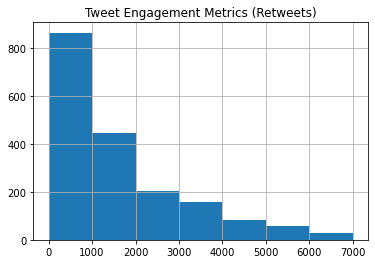

In [295]:
bins90 = range(int(round(tweets_act.retweet_count.quantile(0.05), -3)), int(round(tweets_act.retweet_count.quantile(0.95),-3)), 1000)
tweets_act.loc[:,'retweet_count'].hist(bins=bins90);
plt.title('Tweet Engagement Metrics (Retweets)');

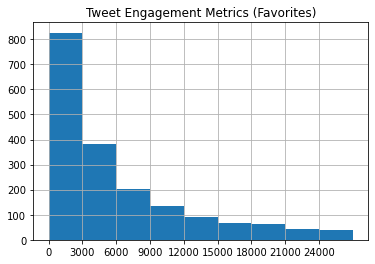

In [315]:
bins90 = range(int(round(tweets_act.favorite_count.quantile(0.05), -3)), int(round(tweets_act.favorite_count.quantile(0.95),-3)), 3000)
tweets_act.loc[:,'favorite_count'].hist(bins = bins90);
plt.xticks(range(0,27000,3000));
plt.title('Tweet Engagement Metrics (Favorites)');

In [311]:
tweets_act[['retweet_count','favorite_count']].describe().astype(int)

,retweet_count,favorite_count
count,1963,1963
mean,2430,8222
std,4342,12091
min,11,70
25%,541,1763
50%,1176,3711
75%,2780,10272
max,76391,154114


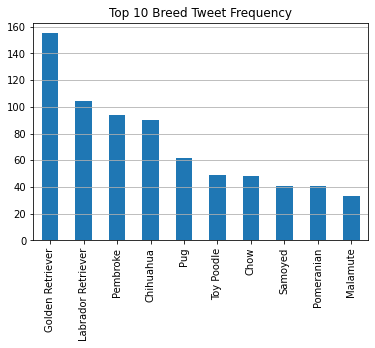

In [283]:
tweets_act.breed_predict.value_counts().nlargest(10).plot.bar();
plt.grid(axis='y');
plt.title('Top 10 Breed Tweet Frequency');

In [284]:
tweets_act.breed_predict.nunique()

113

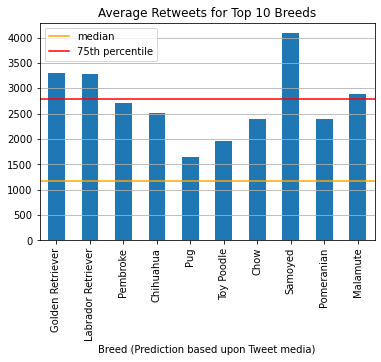

In [307]:
top10breeds = tweets_act.breed_predict.value_counts()[:10].index.tolist()
tweets_act.groupby('breed_predict').mean().retweet_count[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Retweets for Top 10 Breeds');
plt.xlabel('Breed (Prediction based upon Tweet media)');
plt.axhline(tweets_act['retweet_count'].median(), color = 'orange', label = 'median');
plt.axhline(tweets_act['retweet_count'].quantile(0.75), color = 'r', label = '75th percentile');
plt.legend(labels = ['median','75th percentile']);

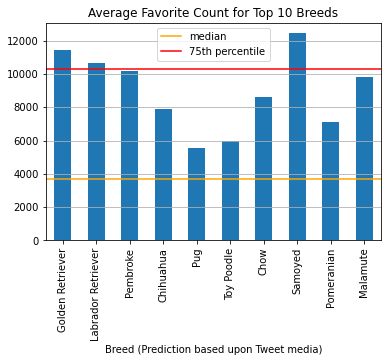

In [308]:
tweets_act.groupby('breed_predict').mean().favorite_count[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Favorite Count for Top 10 Breeds');
plt.xlabel('Breed (Prediction based upon Tweet media)');
plt.axhline(tweets_act['favorite_count'].median(), color = 'orange');
plt.axhline(tweets_act['favorite_count'].quantile(0.75), color = 'r');
plt.legend(labels = ['median','75th percentile']);

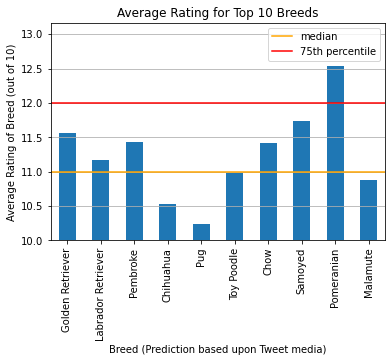

In [319]:
tweets_act.groupby('breed_predict').mean().avg_rating[top10breeds].plot.bar();
plt.grid(axis='y');
plt.title('Average Rating for Top 10 Breeds');
plt.ylim(bottom=10);
plt.xlabel('Breed (Prediction based upon Tweet media)');
plt.ylabel('Average Rating of Breed (out of 10)');
plt.axhline(tweets_act['avg_rating'].median(), color = 'orange');
plt.axhline(tweets_act['avg_rating'].quantile(0.75), color = 'r');
plt.legend(labels = ['median','75th percentile']);

In [318]:
tweets_act[tweets_act.breed_predict.isin(top10breeds)].shape[0]/tweets_act.shape[0]

0.3652572592969944

In [252]:
tweets_act.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64